<a href="https://colab.research.google.com/github/marcus-wuertz/Analytics-Code/blob/main/DS4220_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{steelblue}{\text{Question 1}}$

In [ ]:
# load the data
#install.packages(c('vtable', 'readxl'))
library(vtable)
library(readxl)

cred_data <- read_excel('/content/sample_data/CreditRiskData_HW3.xlsx')

In [ ]:
# Chi -square test of independence
chisq.test(cred_data$CreditRisk, cred_data$LoanPurpose, correct = FALSE)

Warning message in chisq.test(cred_data$CreditRisk, cred_data$LoanPurpose, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  cred_data$CreditRisk and cred_data$LoanPurpose
X-squared = 21.27, df = 9, p-value = 0.01151


## $\color{steelblue}{\text{a) Null and alternative values}}$

The null hypothesis for the chi-squared test states that the variables are related, while the alternative says that they are not. \begin{array}{l}
      H_0: The \:variables \:are \:independent \:(related) \\
      H_1: The \:variables \:are \:NOT \:independent \:(related)
    \end{array}

## $\color{steelblue}{\text{b) Conclusion of Chi-squared test}}$

Because the P value is less than 0.05, we can reject the null hypothesis. The null hypothesis for the chi-squared test states that the variables are related, while the alternative hypothesis is that they are not related. In this case, we can have evidence to reject the null hypothesis that the variables are related. We can tell management that there is significant evidence showing that these variables are not related.

# $\color{steelblue}{\text{Question 3}}$

## $\color{steelblue}{\text{a) boxplot of average savings across credit risk}}$

    Group.1        x
1   Default 1487.957
2 NoDefault 2132.617


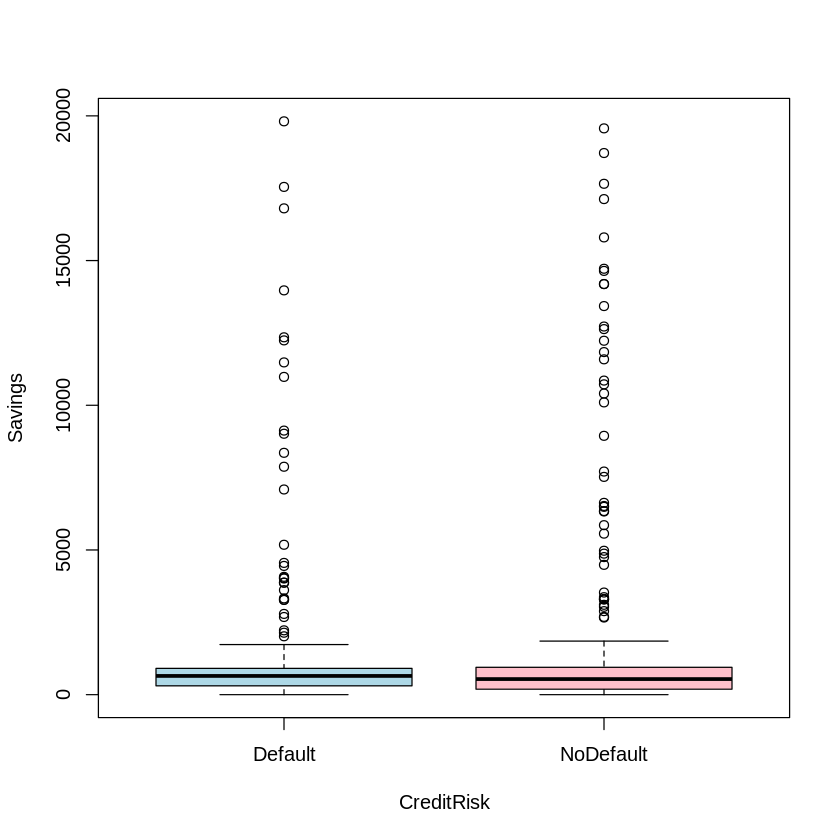

In [ ]:
# create a boxplot to visualize the mean of the two groups
boxplot(Savings ~ CreditRisk, data = cred_data, col = c('lightblue', 'pink'))

#create a crosstab to confirm or deny the boxplot
print(aggregate(cred_data$Savings, list(cred_data$CreditRisk), FUN = mean))

The boxplot of savings across credit risk shows similar plots between the default and no default group. The default group appears to have a slightly larger mean on the boxplot, however, the crosstab shows that the no default group has a higher mean savings than the default group.

## $\color{steelblue}{\text{b) Null and alternative hypothesis}}$

The null hypothesis states that the means of the two groups are equal, while the alternative states that they are not equal.
  \begin{array}{l}
    H_0: \mu_{g1} = \mu_{g2} \\
    H_1: \mu_{g1} \neq \mu_{g2}
  \end{array}

## $\color{steelblue}{\text{c) Using QQ Plot and AD test to check assumptions}}$

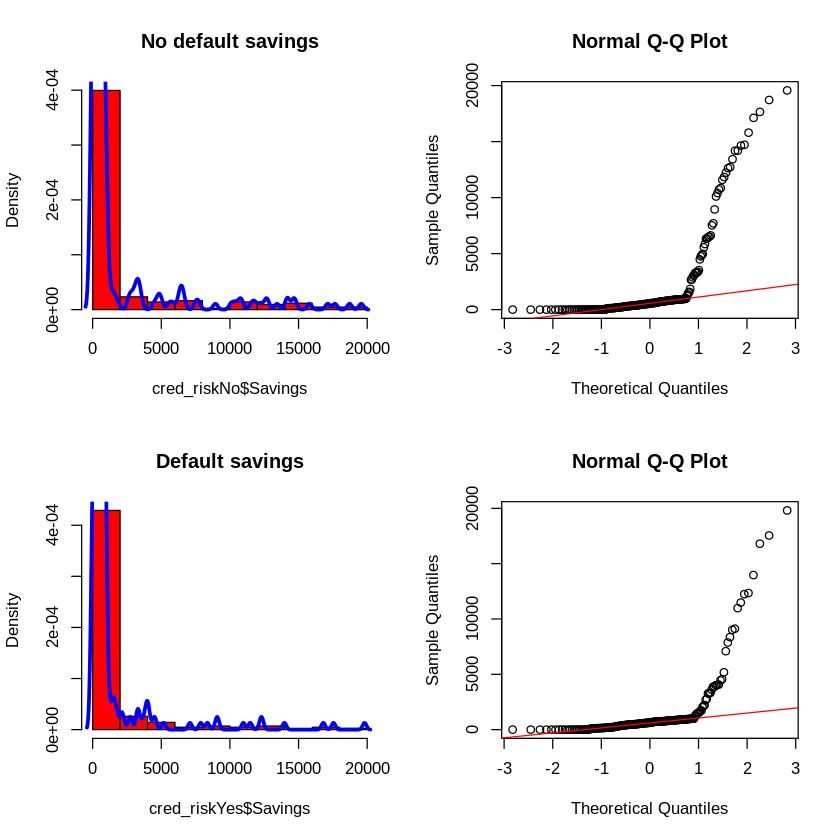

In [ ]:
# create a data corresponding to the 'No' group
cred_riskNo <- cred_data[cred_data$CreditRisk == 'NoDefault', ]

#creating a side-by-side plots
par(mfrow=c(2,2))

#provide a histogram of savings for those who did NOT default
hist(cred_riskNo$Savings, col = 'red', main = 'No default savings', freq = FALSE)
lines(density(cred_riskNo$Savings), lwd=3, col = 'blue')

#proving a QQ plot
qqnorm(cred_riskNo$Savings)
qqline(cred_riskNo$Savings, col='red')

# create a data corresponding to the 'Yes' group
cred_riskYes <- cred_data[cred_data$CreditRisk == 'Default', ]

#provide a histogram of Savings for those who did default
hist(cred_riskYes$Savings, col = 'red', main = 'Default savings', freq = FALSE)
lines(density(cred_riskYes$Savings), lwd=3, col = 'blue')

#proving a QQ plot
qqnorm(cred_riskYes$Savings)
qqline(cred_riskYes$Savings, col='red')

In [ ]:
# perform Anderson-Darling Test
#install.packages('nortest')
library(nortest)

# AD test for those who have not defaulted
ad.test(cred_riskNo$Savings)

# AD test for those who have defaulted
ad.test(cred_riskYes$Savings)


	Anderson-Darling normality test

data:  cred_riskNo$Savings
A = 39.91, p-value < 2.2e-16



	Anderson-Darling normality test

data:  cred_riskYes$Savings
A = 42.011, p-value < 2.2e-16


## $\color{steelblue}{\text{d) Conclusions of QQ plot and AD test}}$

For both groups, the QQ plot and AD test both show that the data does not follow a normal distribution, and therefore does not meet the assumptions for a T tests. The AD test p-value of less than 0.05 means we have evidence to reject the null hypothesis that the data follows a normal distribution. The tests agree with each other, but do not show normal distribution.

## $\color{steelblue}{\text{i) Mann-Whitney U test}}$

In [ ]:
wilcox.test(Savings ~ CreditRisk, data = cred_data, exact = FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Savings by CreditRisk
W = 23679, p-value = 0.3836
alternative hypothesis: true location shift is not equal to 0


The p-value greater than 0.05 means that we do not have sufficient evidence to reject the null hypothesis. In this case, the null hypothesis is that the means are the same.

# $\color{steelblue}{\text{Question 4}}$

## $\color{steelblue}{\text{a) Create a boxplot and crosstab}}$

  Group.1        x
1   Other 32.34615
2     Own 21.82192
3    Rent 20.70370


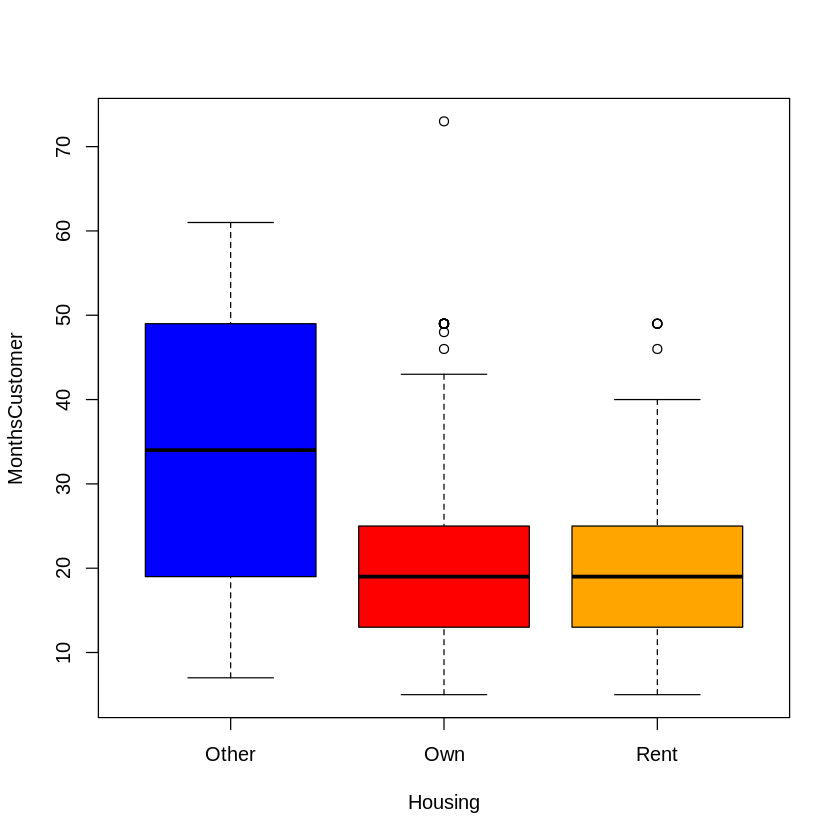

In [ ]:
# create boxplots of housing across months customer
boxplot(MonthsCustomer ~ Housing,
        data=cred_data, col=c('blue', 'red', 'orange'))

# get a crosstab to confirm box plot
print(aggregate(cred_data$MonthsCustomer, list(cred_data$Housing), FUN = mean))

The boxplot and crosstab display similar information. Both show that the means of the 'own' and 'rent' groups are very similar, while the 'other' group has a higher mean and higher maximum. The 'other' category has the highest average months customer across the groups.

## $\color{steelblue}{\text{b) Null and alternative hypotheses}}$

The null hypothesis for ANOVA testing is that all of the groups have equal means, while the alternative hypothesis states that at least one of the groups has a different mean. In this case, the data violates the normality assumption, so we use the Kruskal-Wallis non-parametric test, which has the same null and alternative hypothesis.
\begin{array}{l}
    H_0: \mu_{g1} = \mu_{g2} = \mu_{g3} = ⋯ \mu_{g_k}\\
    H_1: At \:least \:one \:group \:has \:a \:different \:mean
  \end{array}

## $\color{steelblue}{\text{c) Checking assumptions using QQ plot and AD test}}$

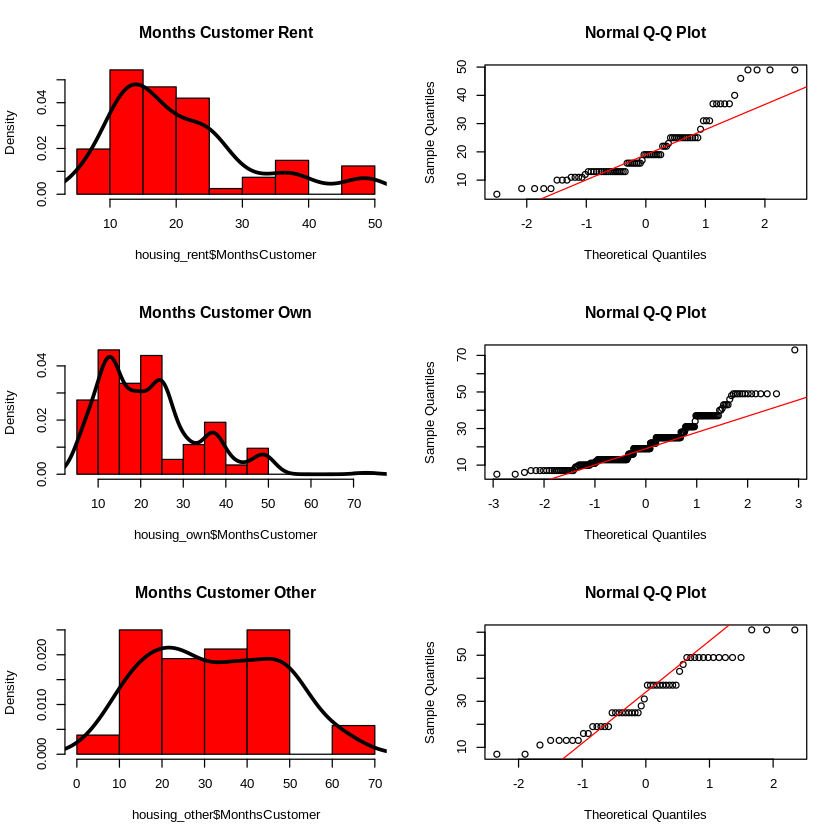

In [ ]:
# checking anova assumption: normality assumptions for ALL groups with QQ plot
#get data for those who rent
housing_rent <- cred_data[cred_data$Housing == 'Rent', ]

#plotting a side-by-side plot
par(mfrow=c(3,2))

#provide a histogram of contactDurationSec for those who are married
hist(housing_rent$MonthsCustomer, col='red', main = 'Months Customer Rent', freq = FALSE)
lines(density(housing_rent$MonthsCustomer), lwd = 3, )

#providing a QQ plot
qqnorm(housing_rent$MonthsCustomer)
qqline(housing_rent$MonthsCustomer, col='red')

#get data for those who own
housing_own <- cred_data[cred_data$Housing == 'Own', ]

#provide a histogram of contactDurationSec for those who are married
hist(housing_own$MonthsCustomer, col='red', main = 'Months Customer Own', freq = FALSE)
lines(density(housing_own$MonthsCustomer), lwd = 3, )

#providing a QQ plot
qqnorm(housing_own$MonthsCustomer)
qqline(housing_own$MonthsCustomer, col='red')

#get data for those with other housing
housing_other <- cred_data[cred_data$Housing == 'Other', ]

#provide a histogram of contactDurationSec for those who are married
hist(housing_other$MonthsCustomer, col='red', main = 'Months Customer Other', freq = FALSE)
lines(density(housing_other$MonthsCustomer), lwd = 3, )

#providing a QQ plot
qqnorm(housing_other$MonthsCustomer)
qqline(housing_other$MonthsCustomer, col='red')

In [ ]:
#AD tests for Housing categories
# AD test for those who are divorced
ad.test(housing_rent$MonthsCustomer)
ad.test(housing_own$MonthsCustomer)
ad.test(housing_other$MonthsCustomer)


	Anderson-Darling normality test

data:  housing_rent$MonthsCustomer
A = 3.0624, p-value = 9.404e-08



	Anderson-Darling normality test

data:  housing_own$MonthsCustomer
A = 6.915, p-value < 2.2e-16



	Anderson-Darling normality test

data:  housing_other$MonthsCustomer
A = 1.1777, p-value = 0.004062


## $\color{steelblue}{\text{d) Conclusions of AD test and QQ plot}}$

The QQ plots and AD tests all agree with each other, none of the groups follow normal distribution. In boths tests, we see that the 'other' category is the closest to normal distribution, but all AD test p-values fall below 0.05, meaning there is evidence to reject the null hypothesis that the data follow normal distribution.

## $\color{steelblue}{\text{i) Non-parametric tests}}$

In [ ]:
# use KW test because data violates normality assumption
#install.packages('FSA')
library(FSA)

#conduct a KW test and interpret the results
kruskal.test(MonthsCustomer ~ Housing, data=cred_data)

## FSA v0.9.5. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.




	Kruskal-Wallis rank sum test

data:  MonthsCustomer by Housing
Kruskal-Wallis chi-squared = 25.094, df = 2, p-value = 3.555e-06


Because of the p-value, we have evidence to reject the null hypothesis that all of the means are equal.

# $\color{steelblue}{\text{Question 5}}$

In [ ]:
# do a Dunn test after the KW test
dunnTest(MonthsCustomer ~ Housing, data=cred_data)

Warning message:
“Housing was coerced to a factor.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




    Comparison        Z      P.unadj        P.adj
1  Other - Own 4.729554 2.250133e-06 6.750398e-06
2 Other - Rent 4.547923 5.417792e-06 1.083558e-05
3   Own - Rent 0.766650 4.432896e-01 4.432896e-01

Before the Dunn test, all we knew was that one or more of the groups have unequal means. Now, we know that the other-own and other-rent groups have p-values below 0.05, so we have evidence to reject the null hypothesis that those are equal. The own-rent group is the only one that has a p-value greater than 0.05, and thus we cannot reject the null hypothesis that those group means are equal. We would tell management that the 'other-own' and 'other-rent' groups have significant evidence to reject the hypothesis that they are equal.